In [1]:
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime

import niskine
import mplniw.plot as pl
import gvpy as gv
import mplniw.sigp as sp
import mplniw.utils as ut
import os

In [2]:
conf = niskine.io.load_config()
lon, lat, bottom_depth = niskine.io.mooring_location(mooring=1)
root_dir = '/Users/zcasparcohen/codes/NIW/'
figdir = '/Users/zcasparcohen/Documents/Figures/'

In [18]:
mooring=1
ds_filt = xr.open_dataset(root_dir+'data/M%s_bpfiltered.nc'%mooring)
T = xr.open_dataset(root_dir+'data/t_10m_2min.nc').load()
T = T.rename({'__xarray_dataarray_variable__':'temperature'})

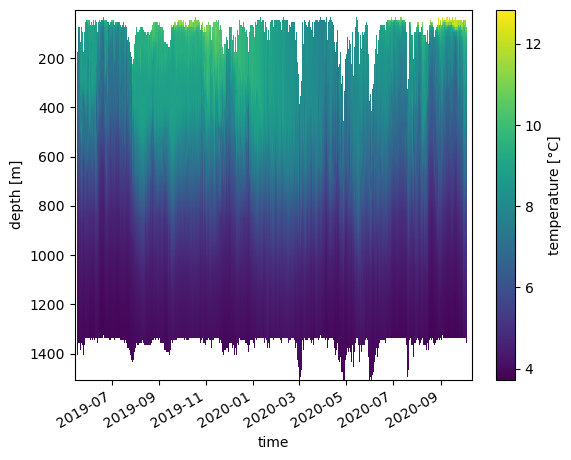

In [11]:
T.temperature.plot(y='depth',yincrease=False)


(1400.0, 50.0)

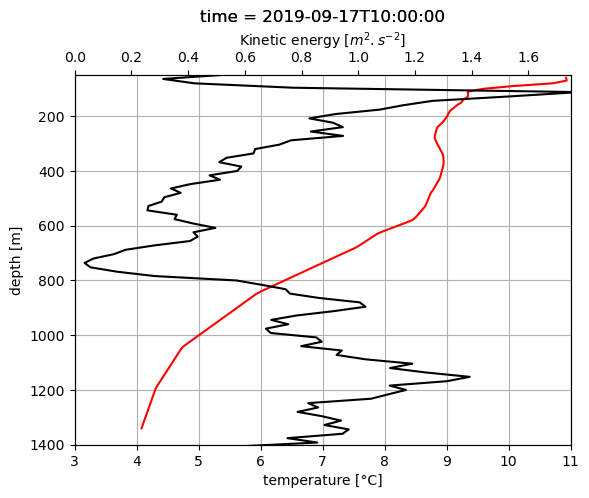

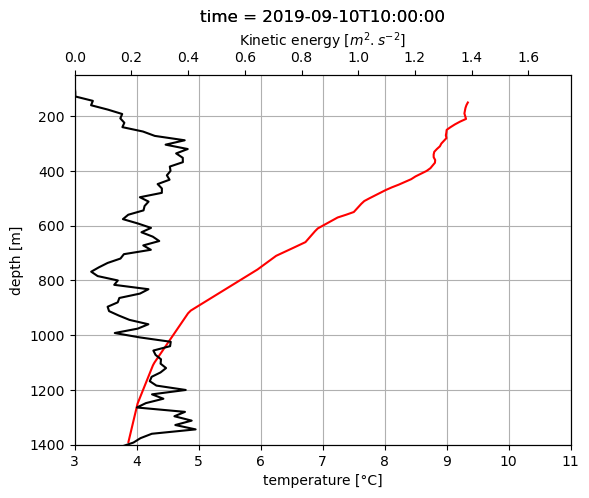

In [43]:
date0 = '2019-09-17T10:00:00'
date1 = '2019-09-10T10:00:00'
fig,ax = plt.subplots()
T.temperature.sel(time=date0).plot(ax=ax,y='depth',yincrease=False,c='r',xlim=(3,11))
ax1 = ax.twiny()
ds_filt.ni_eke.sel(time=date0,method='nearest').plot(ax=ax1,y='z',yincrease=False,c='k',xlim=(0,1.75))
ax.grid();ax.set_ylim(1400,50)

fig,ax = plt.subplots()
T.temperature.sel(time=date1).plot(ax=ax,y='depth',yincrease=False,c='r',xlim=(3,11))
ax1 = ax.twiny()
ds_filt.ni_eke.sel(time=date1,method='nearest').plot(ax=ax1,y='z',yincrease=False,c='k',xlim=(0,1.75))
ax.grid();ax.set_ylim(1400,50)

(1400.0, 50.0)

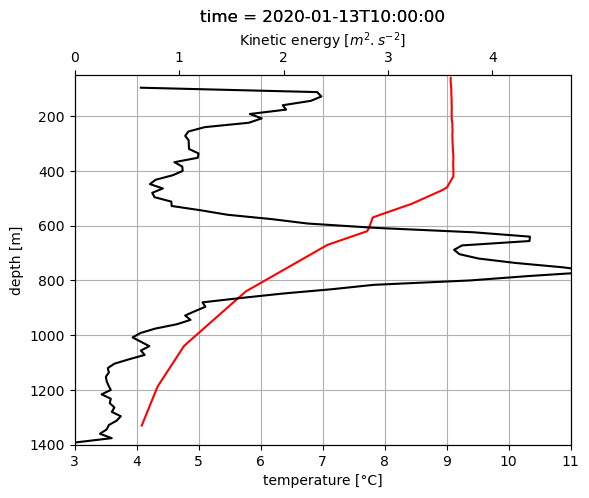

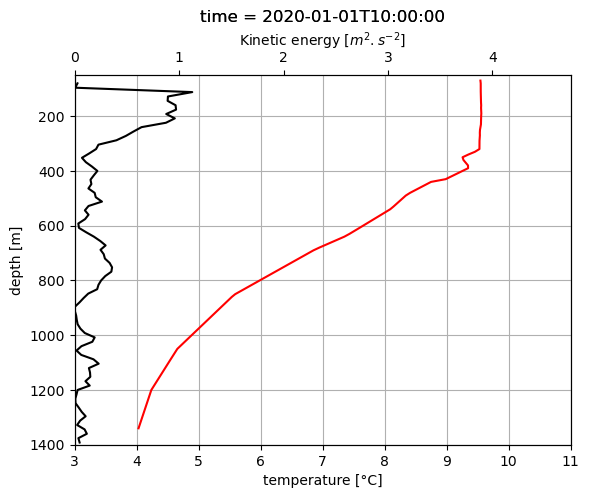

In [49]:
date0 = '2020-01-13T10:00:00'
date1 = '2020-01-01T10:00:00'
fig,ax = plt.subplots()
T.temperature.sel(time=date0).plot(ax=ax,y='depth',yincrease=False,c='r',xlim=(3,11))
ax1 = ax.twiny()
ds_filt.ni_eke.sel(time=date0,method='nearest').plot(ax=ax1,y='z',yincrease=False,c='k',xlim=(0,4.75))
ax.grid();ax.set_ylim(1400,50)

fig,ax = plt.subplots()
T.temperature.sel(time=date1).plot(ax=ax,y='depth',yincrease=False,c='r',xlim=(3,11))
ax1 = ax.twiny()
ds_filt.ni_eke.sel(time=date1,method='nearest').plot(ax=ax1,y='z',yincrease=False,c='k',xlim=(0,4.75))
ax.grid();ax.set_ylim(1400,50)

In [4]:
#_roll = T.__xarray_dataarray_variable__.roll({'depth':-10})
_ = T.__xarray_dataarray_variable__
#Tdiff = _-_roll
Tdiff = _.isel(depth=slice(0,None)).differentiate('depth')

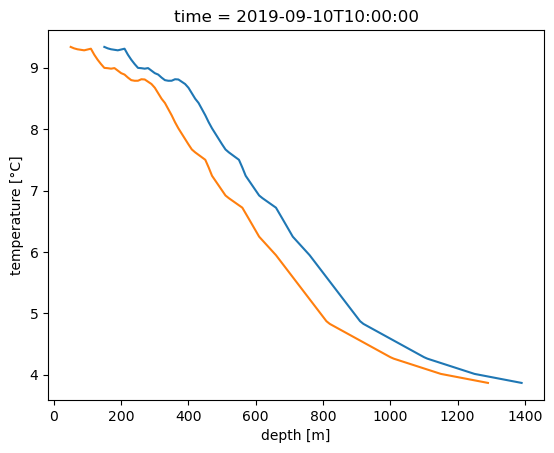

In [40]:
_.sel(time='2019-09-10T10:00:00').plot()
_roll.sel(time='2019-09-10T10:00:00').plot()

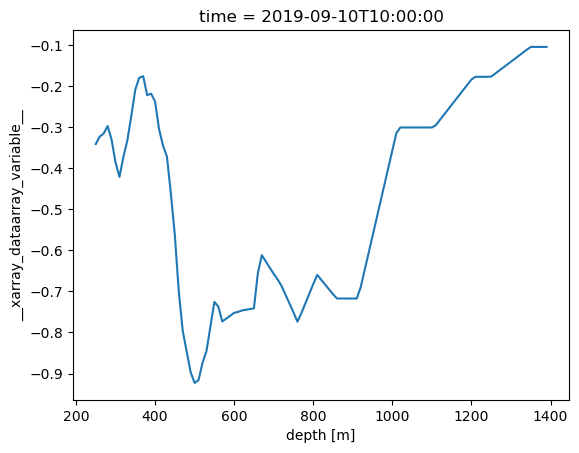

In [34]:
(_-_roll).sel(time='2019-09-10T10:00:00',method='nearest').plot()

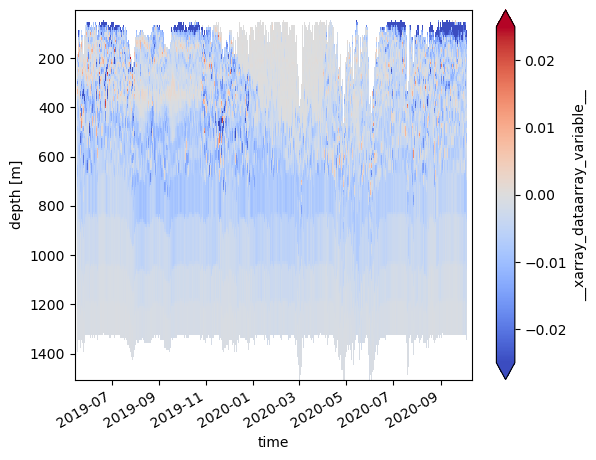

In [6]:
#_.plot(y='depth',yincrease=False)
plt.figure()
Tdiff.plot(y='depth',yincrease=False,vmax=0.025,cmap='coolwarm')

In [3]:
listdir = os.listdir(root_dir+'data/microcat')

In [4]:
microcat = {l.split('_')[1]:xr.open_dataset(root_dir+'data/microcat/'+l) for l in listdir}

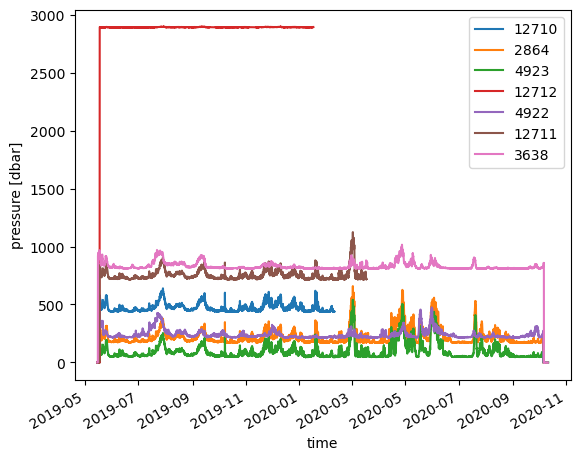

In [49]:
for ds in microcat:
    microcat[ds].p.plot(label=ds)
plt.legend()

In [44]:
microcat.keys()

dict_keys(['12710', '2864', '4923', '12712', '4922', '12711', '3638'])

### Microcat number at corresponding mooring:
Mooring 1: 12712

Mooring 2: 4922

Mooring 3: 3638

3 remaining